<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h2 style="text-align: center;"><b>Анализ данных по методологии CrispDM</b></h2>

# 2. Подготовка данных
## 2.1 Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# # Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [2]:
import os
import sys

sys.path.insert(0, '..')

In [3]:
from scripts.data.util import load_dataset, save_dataset

In [4]:
from scripts.data.util import save_model

# 3. Моделирование

## 3.1 Загрузка данных

In [5]:
wine = load_dataset("prep_data.csv", 'intermid')
wine.shape

(19838, 13)

In [6]:
X = wine[wine.columns[:-1]]
X.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.0,0.264463,0.126667,0.292683,0.648387,0.059801,0.302405,0.454924,0.598965,0.217054,0.130682,0.115942
1,1.0,0.206612,0.146667,0.276423,0.032258,0.066445,0.089347,0.349515,0.297111,0.449612,0.153409,0.217391


In [7]:
y = wine['quality']
y.head(2)

0    6
1    6
Name: quality, dtype: int64

### 3.2 Создание датасетов

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.3 Выбор модели

Будем строить несколько моделей:

    - Logistic Regression
    - Decision Tree Classifier
    - Random Forest Classifier
    - Stacking Classifier

### 3.4 Обучение моделей

#### Logistic Regression

In [9]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [10]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           3       0.47      0.41      0.44       571
           4       0.47      0.51      0.49       550
           5       0.41      0.48      0.45       560
           6       0.37      0.24      0.29       573
           7       0.36      0.28      0.31       540
           8       0.46      0.46      0.46       609
           9       0.70      1.00      0.82       565

    accuracy                           0.48      3968
   macro avg       0.46      0.48      0.47      3968
weighted avg       0.46      0.48      0.47      3968



#### Decision Tree Classifier

In [11]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)

In [12]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           3       0.97      0.97      0.97       571
           4       0.89      0.89      0.89       550
           5       0.69      0.73      0.71       560
           6       0.62      0.56      0.59       573
           7       0.74      0.77      0.76       540
           8       0.90      0.92      0.91       609
           9       0.99      1.00      1.00       565

    accuracy                           0.83      3968
   macro avg       0.83      0.83      0.83      3968
weighted avg       0.83      0.83      0.83      3968



#### Random Forest Classifier

In [13]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)

In [14]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           3       0.98      1.00      0.99       571
           4       0.96      0.97      0.97       550
           5       0.81      0.82      0.81       560
           6       0.78      0.63      0.70       573
           7       0.81      0.92      0.86       540
           8       0.96      0.98      0.97       609
           9       1.00      1.00      1.00       565

    accuracy                           0.90      3968
   macro avg       0.90      0.90      0.90      3968
weighted avg       0.90      0.90      0.90      3968



#### Stacking Classifier

In [15]:
clf1 = KNeighborsClassifier(n_neighbors=2)
clf2 = RandomForestClassifier(n_estimators = 100) 
clf3 = DecisionTreeClassifier(random_state=42)

In [16]:
estimators = [
    ('KNN', clf1),
    ('Random_forest', clf2),
    ('Decision Tree', clf3)
]

st = StackingClassifier(estimators = estimators, final_estimator=LogisticRegression())
st.fit(X_train, y_train)
pred_st = st.predict(X_test)

In [17]:
print(classification_report(y_test, pred_st))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       571
           4       0.97      0.99      0.98       550
           5       0.85      0.85      0.85       560
           6       0.79      0.73      0.76       573
           7       0.87      0.91      0.89       540
           8       0.98      0.99      0.98       609
           9       1.00      1.00      1.00       565

    accuracy                           0.92      3968
   macro avg       0.92      0.92      0.92      3968
weighted avg       0.92      0.92      0.92      3968



# 4. Оценка

In [18]:
lr_acc = accuracy_score(y_test, y_pred_lr)
dt_acc = accuracy_score(y_test, pred_dt)
rf_acc = accuracy_score(y_test, pred_rf)
st_acc = accuracy_score(y_test, pred_st)

In [19]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree Classifier', 
              'Random Forest Classifier', 'Stacking Classifier'],
    'Accuracy': [lr_acc, dt_acc, rf_acc, st_acc]})

In [20]:
# show all the models 
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
3,Stacking Classifier,0.924647
2,Random Forest Classifier,0.902470
1,Decision Tree Classifier,0.833921
0,Logistic Regression,0.484123


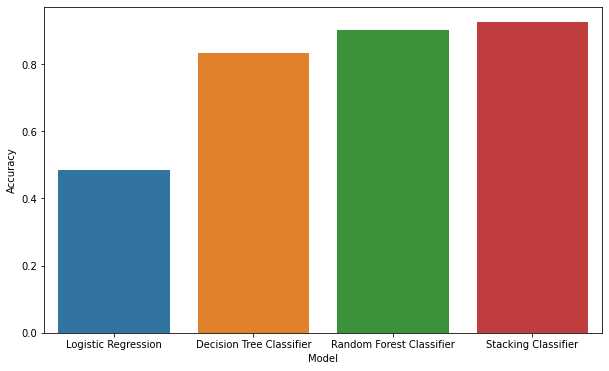

In [21]:

plt.figure(figsize=(10,6))
sns.barplot(x='Model',y='Accuracy',data=models)
plt.show()

# 5. Сохранение моделей

In [26]:
save_model(lr, 'lr_model')

In [23]:
save_model(dt, 'dt_model')

In [24]:
save_model(rf, 'rf_model')

In [25]:
save_model(st, 'st_model')